In [249]:
import pandas as pd
r31=pd.read_csv('trades_round_3_day_0_nn.csv', sep=';')
r32=pd.read_csv('trades_round_3_day_1_nn.csv', sep=';')
r33=pd.read_csv('trades_round_3_day_2_nn.csv', sep=';')

In [250]:
import pandas as pd
import numpy as np
def interpolate_missing_values(data):
    # Sample data setup
    df = pd.DataFrame(data)
    new_timestamps = pd.DataFrame({
        'timestamp': range(0, 999901, 100)
    })
    df_full = pd.merge(new_timestamps, df, on='timestamp', how='left')
    df_full['price'] = df_full['price'].interpolate(method='linear')
    return df_full

def data(result):
    products=['CHOCOLATE','ROSES','STRAWBERRIES','GIFT_BASKET']
    return {product: interpolate_missing_values(result[result['symbol'] == product].drop(columns=['buyer', 'seller', 'currency']).reset_index(drop=True)) for product in products}

def merged_data(result):
    result_mod= data(result)
    gift=result_mod['CHOCOLATE'].merge(result_mod['ROSES'], on='timestamp',how='inner', suffixes=('_c', '_r'))
    gift=gift.merge(result_mod['STRAWBERRIES'], on='timestamp',how='inner')
    gift=gift.merge(result_mod['GIFT_BASKET'], on='timestamp',how='inner', suffixes=('_s', '_g'))
    gift.drop(columns=['symbol_c', 'symbol_r', 'symbol_s', 'symbol_g', 'quantity_c', 'quantity_r', 'quantity_s','quantity_g'],inplace=True)
    gift.dropna(inplace=True)
    return gift
    

In [253]:
gift_=merged_data(r31)

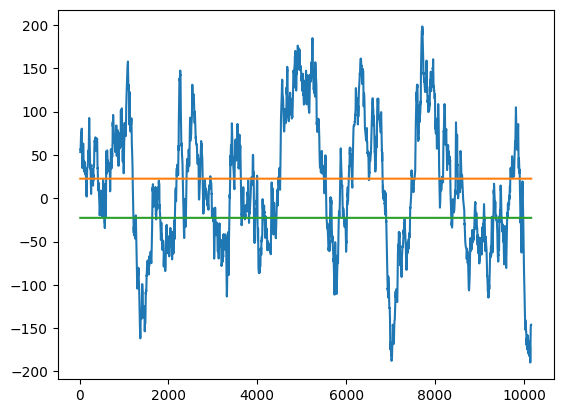

In [281]:
import plotly.express as px
import plotly.graph_objects as go

result=r33
std_m=0.3

gift_=merged_data(result)
gift_['sum']=0
gift_['sum']=gift_['price_c']*4 + gift_['price_r']*1 + gift_['price_s']*6 + 374
gift_['sys']=(gift_['price_g']-gift_['sum']).std()*std_m
(gift_['price_g']-gift_['sum']).plot()
gift_['sys'].plot()
(gift_['sys']*-1).plot()

gift_['sum']=0
gift_['sum']=gift_['price_c']*4 + gift_['price_r']*1 + gift_['price_s']*6 + 373
fig = px.line(gift_, x='timestamp', y=['sum', 'price_g'])
fig.add_trace(go.Scatter(x=result[result['symbol']=='GIFT_BASKET']['timestamp'], y=result[result['symbol']=='GIFT_BASKET']['price'], mode='markers', name='g_price_g'))

fig.show()

In [303]:
gb = pd.concat([result[result['symbol'] == 'STRAWBERRIES'] for result in [r31, r32, r33]], axis=0)


In [300]:
gb.reset_index(drop=True, inplace=True)

<Axes: >

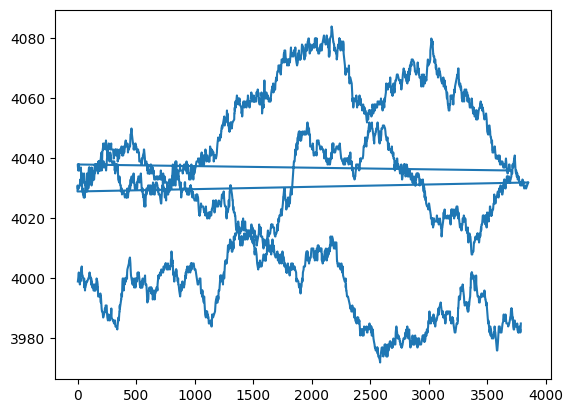

In [304]:
gb['price'].plot()

<Axes: >

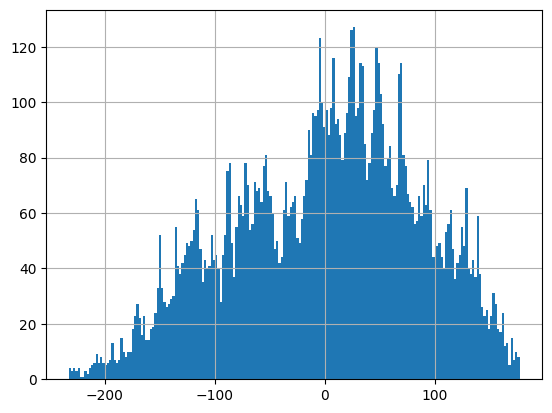

In [275]:
(gift_['price_g']-gift_['sum']).hist(bins=200)


In [143]:
result=pd.read_csv('result_43k.csv', sep=';')

In [145]:
result.drop(columns=['bid_price_1', 'bid_volume_1', 'bid_price_2','bid_volume_2','bid_price_3','bid_volume_3','ask_price_1','ask_volume_1','ask_price_2','ask_volume_2','ask_price_3','ask_volume_3'],inplace=True)

In [147]:
daily_pnl_sum=result.groupby('timestamp')['profit_and_loss'].sum()

<Axes: xlabel='timestamp'>

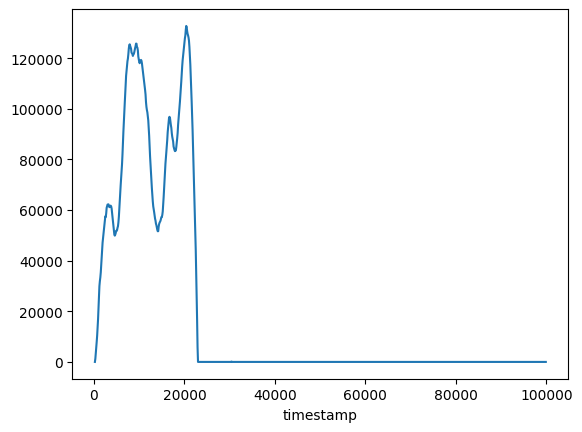

In [156]:
(daily_pnl_sum.cumsum().cummax()-daily_pnl_sum.cumsum()).plot()

<Axes: xlabel='timestamp'>

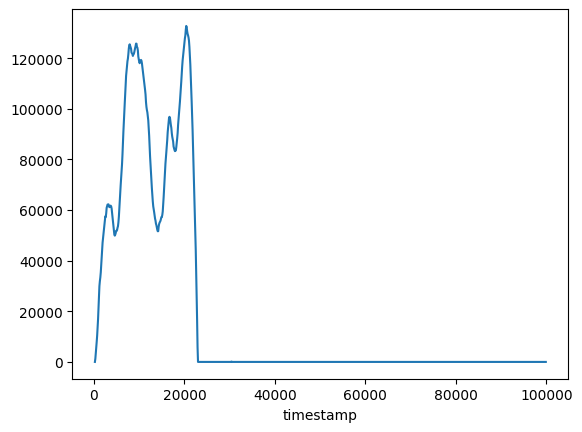

In [160]:
roll_max = daily_pnl_sum.cumsum().cummax()
daily_drawdown = roll_max-daily_pnl_sum.cumsum()
daily_drawdown.plot()

In [164]:
daily_pnl_sum[:20]

timestamp
200        0.000000
300    -1243.691406
400    -2117.167969
500    -2280.503906
600    -2326.988281
700    -2434.507812
800    -3270.511719
900    -3216.753906
1000   -4787.093750
1100   -4013.414062
1200   -4272.214844
1300   -1961.882812
1400   -1448.011719
1500   -2008.097656
1600   -2919.884766
1700   -3526.572266
1800   -2412.300781
1900   -2882.308594
2000   -1841.187500
2100   -1856.664062
Name: profit_and_loss, dtype: float64

In [166]:
daily_pnl_sum.cumsum()[:20]

timestamp
200         0.000000
300     -1243.691406
400     -3360.859375
500     -5641.363281
600     -7968.351562
700    -10402.859375
800    -13673.371094
900    -16890.125000
1000   -21677.218750
1100   -25690.632812
1200   -29962.847656
1300   -31924.730469
1400   -33372.742188
1500   -35380.839844
1600   -38300.724609
1700   -41827.296875
1800   -44239.597656
1900   -47121.906250
2000   -48963.093750
2100   -50819.757812
Name: profit_and_loss, dtype: float64

In [170]:
daily_pnl_sum.shift(-1)

timestamp
200      -1243.691406
300      -2117.167969
400      -2280.503906
500      -2326.988281
600      -2434.507812
             ...     
99500    40950.984375
99600    41056.968750
99700    40841.312500
99800    39925.875000
99900             NaN
Name: profit_and_loss, Length: 998, dtype: float64

In [181]:
(daily_pnl_sum.shift(-1)-daily_pnl_sum)[(daily_pnl_sum.shift(-1)-daily_pnl_sum)>-500].sum()

222026.525390625

<Axes: >

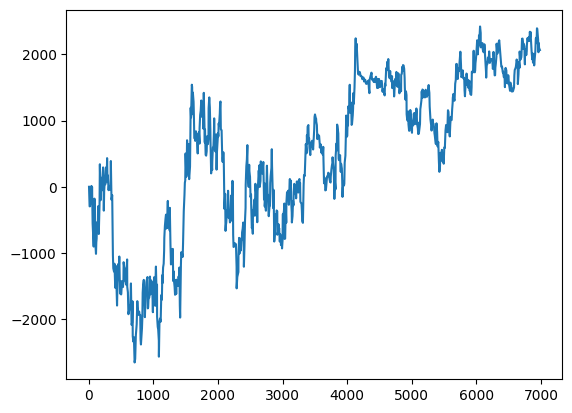

In [187]:
result[result['product']=='CHOCOLATE']['profit_and_loss'].plot()

<Axes: >

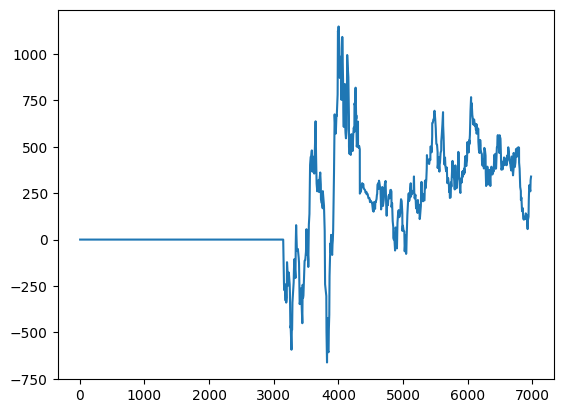

In [188]:
result[result['product']=='STRAWBERRIES']['profit_and_loss'].plot()

<Axes: >

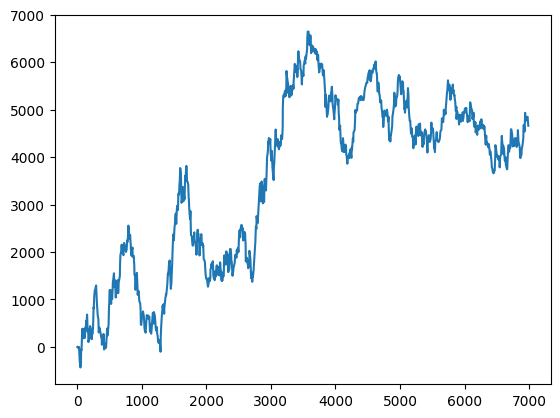

In [189]:
result[result['product']=='ROSES']['profit_and_loss'].plot()

<Axes: >

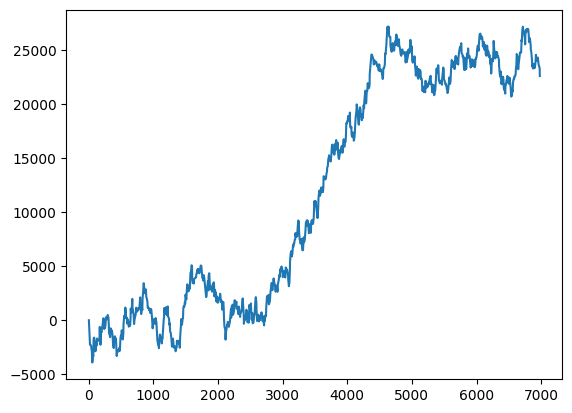

In [190]:
result[result['product']=='GIFT_BASKET']['profit_and_loss'].plot()

<Axes: >

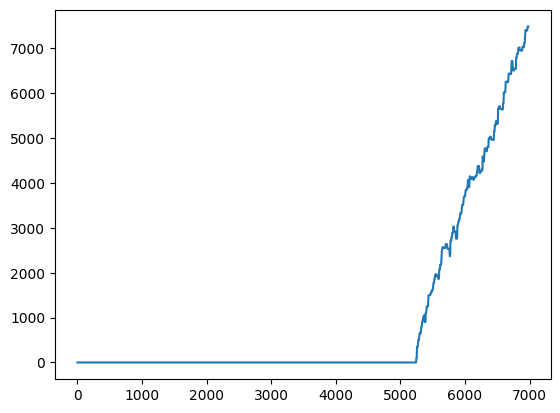

In [184]:
result[result['product']=='ORCHIDS']['profit_and_loss'].plot()

<Axes: xlabel='timestamp'>

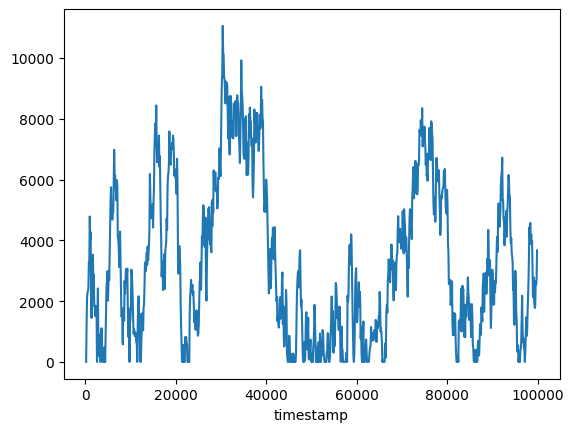

In [168]:
(daily_pnl_sum.cummax()-daily_pnl_sum).plot()

<Axes: xlabel='timestamp'>

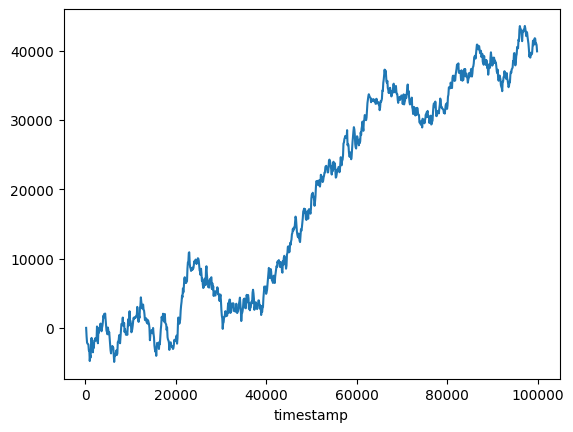

In [157]:
daily_pnl_sum.plot()

In [191]:
result_orchid=pd.read_csv('result_43k.csv', sep=';')

In [192]:
result_orchid=result_orchid[result_orchid['product']=='ORCHIDS']

In [194]:
result_orchid.insert(3, 'bid', (result_orchid['bid_price_1']+result_orchid['bid_price_2']+result_orchid['bid_price_3'])/3)
result_orchid.insert(4, 'ask', (result_orchid['ask_price_1']+result_orchid['ask_price_2']+result_orchid['ask_price_3'])/3)  

<Axes: xlabel='timestamp'>

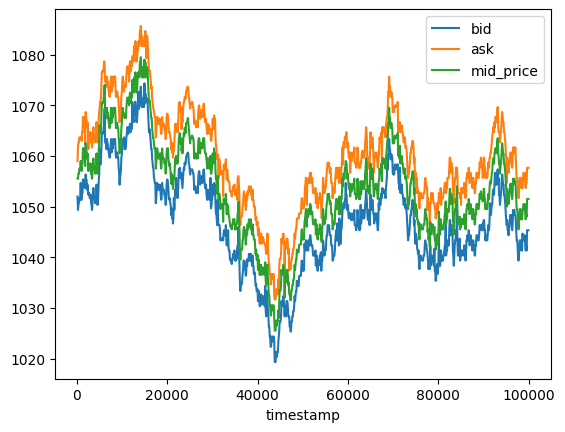

In [206]:
result_orchid.plot(x='timestamp', y=['bid', 'ask', 'mid_price'])

In [197]:
result_orchid

,day,timestamp,product,bid,ask,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,2,200,ORCHIDS,1052.000000,1059.000000,1053,7,1052.0,2.0,1051.0,15.0,1058,15,1059.0,13.0,1060.0,2.0,1055.5,0.0
10,2,300,ORCHIDS,1049.333333,1061.666667,1052,8,1051.0,3.0,1045.0,47.0,1059,8,1060.0,3.0,1066.0,47.0,1055.5,0.0
17,2,400,ORCHIDS,1050.333333,1062.666667,1053,9,1052.0,5.0,1046.0,58.0,1060,9,1061.0,5.0,1067.0,58.0,1056.5,0.0
27,2,500,ORCHIDS,1050.666667,1062.666667,1053,10,1052.0,2.0,1047.0,48.0,1060,10,1061.0,2.0,1067.0,48.0,1056.5,0.0
29,2,600,ORCHIDS,1051.666667,1063.666667,1054,9,1053.0,4.0,1048.0,58.0,1061,9,1062.0,4.0,1068.0,58.0,1057.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,2,99500,ORCHIDS,1041.333333,1054.666667,1044,9,1043.0,2.0,1037.0,50.0,1052,9,1053.0,2.0,1059.0,50.0,1048.0,7400.0
6964,2,99600,ORCHIDS,1045.333333,1057.666667,1048,8,1047.0,3.0,1041.0,48.0,1055,8,1056.0,3.0,1062.0,48.0,1051.5,7400.0
6969,2,99700,ORCHIDS,1045.333333,1057.666667,1048,10,1047.0,5.0,1041.0,56.0,1055,10,1056.0,5.0,1062.0,56.0,1051.5,7490.0
6974,2,99800,ORCHIDS,1045.333333,1057.666667,1048,9,1047.0,2.0,1041.0,50.0,1055,9,1056.0,2.0,1062.0,50.0,1051.5,7490.0


[*********************100%%**********************]  1 of 1 completed


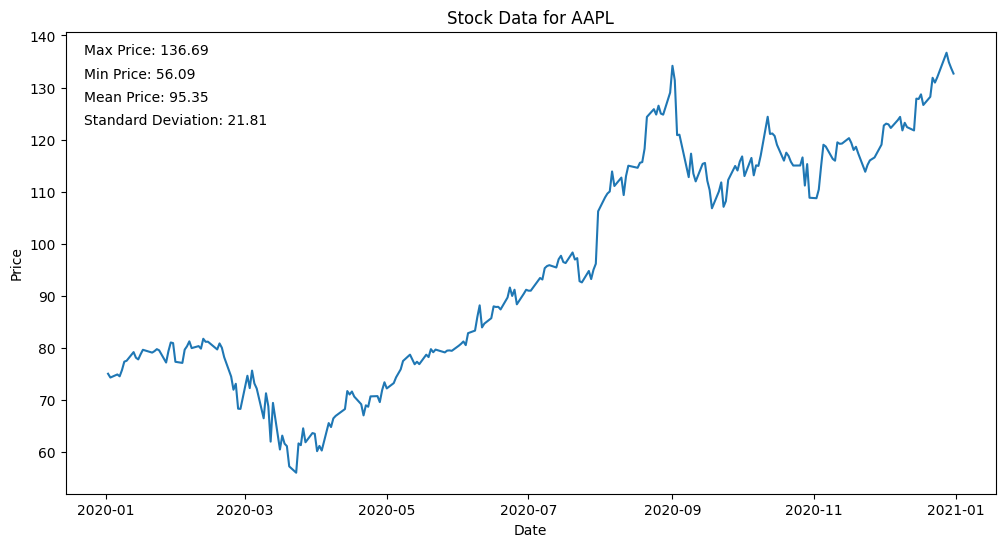

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stock_data(ticker, start_date, end_date):
    # Download stock data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Plot the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'])
    plt.title(f'Stock Data for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Add statistics to the graph
    plt.text(0.02, 0.95, f"Max Price: {data['Close'].max():.2f}", transform=plt.gca().transAxes)
    plt.text(0.02, 0.90, f"Min Price: {data['Close'].min():.2f}", transform=plt.gca().transAxes)
    plt.text(0.02, 0.85, f"Mean Price: {data['Close'].mean():.2f}", transform=plt.gca().transAxes)
    plt.text(0.02, 0.80, f"Standard Deviation: {data['Close'].std():.2f}", transform=plt.gca().transAxes)

    # Show the graph
    plt.show()
plot_stock_data('AAPL', '2020-01-01', '2021-01-01')